In [90]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ruta = "data/"

* Leer la base de datos `edades.csv`

array([[<Axes: title={'center': 'edades'}>]], dtype=object)

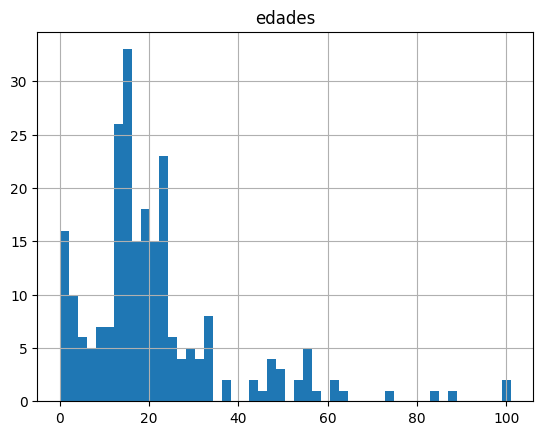

In [34]:
df_edades=pd.read_csv(ruta+'edades.csv')
df_edades.hist(bins=50)

In [35]:
df_edades.describe()

,edades
count,236.000000
mean,21.394068
std,16.516188
min,0.000000
25%,13.000000
50%,18.000000
75%,24.000000
max,101.000000


* Discretizar los datos en 10 intervalos iguales. ¿Cuántas personas forman parte de cada intervalo? ¿Cuál es este intervalo?

In [36]:
bins=10
Max = df_edades['edades'].max()
Min = df_edades['edades'].min()
intervalo=(Max-Min) / bins
# Este sería el ancho constante del intervalo
intervalo

10.1

In [37]:
intervalos = np.linspace(Min, Max, bins+1)
# Estos son los intervalos, sabiendo que la edad minima es 0 y máxima 101
# Cada intervalo de ancho constante es de 10.1 
intervalos

array([  0. ,  10.1,  20.2,  30.3,  40.4,  50.5,  60.6,  70.7,  80.8,
        90.9, 101. ])

* Discretizar los datos en edades de 10 en 10. ¿Cuántas personas forman parte de cada intervalo?

In [38]:
# Primero se definen los intervalos en los que cae cada edad.
df_edades['edades_intervalo'] = pd.cut(df_edades['edades'], intervalos, include_lowest=True)
df_edades.head(5)

,edades,edades_intervalo
0,0,"(-0.001, 10.1]"
1,0,"(-0.001, 10.1]"
2,1,"(-0.001, 10.1]"
3,1,"(-0.001, 10.1]"
4,1,"(-0.001, 10.1]"


In [39]:
# ¿Cuántas personas forman parte de cada intervalo?
df_edades['edades_intervalo'].value_counts(sort=False)

(-0.001, 10.1]    44
(10.1, 20.2]      99
(20.2, 30.3]      53
(30.3, 40.4]      14
(40.4, 50.5]      10
(50.5, 60.6]       8
(60.6, 70.7]       3
(70.7, 80.8]       1
(80.8, 90.9]       2
(90.9, 101.0]      2
Name: edades_intervalo, dtype: int64

In [40]:
# Se discretiza por la media
# esta es la media de las edades por cada intervalo
edades_disc_ancho = df_edades.groupby('edades_intervalo')['edades'].mean()
edades_disc_ancho

edades_intervalo
(-0.001, 10.1]      4.340909
(10.1, 20.2]       15.777778
(20.2, 30.3]       24.169811
(30.3, 40.4]       33.642857
(40.4, 50.5]       46.800000
(50.5, 60.6]       55.375000
(60.6, 70.7]       62.333333
(70.7, 80.8]       74.000000
(80.8, 90.9]       86.000000
(90.9, 101.0]     100.000000
Name: edades, dtype: float64

* Discretizar los datos y nombrar los intervalos de acuerdo a la siguiente tabla:

Nombre del rango|Rango
------------------|:--------:
bebé|0-2
niño|3-11
adolecente|12-17
joven|18-25
adulto joven|26-39
adulto maduro|40-59
adulto mayor |60 en adelante

Para nombrar los intervalos use el argumento `labels` de la función `cut`

In [52]:
# rightbool, default True
# Indicates whether bins includes the rightmost edge or not. 
# If right == True (the default), then the bins [1, 2, 3, 4] indicate 
# (1,2], (2,3], (3,4]. This argument is ignored when bins is an IntervalIndex.

intervalos = np.array([0,2,11,17,25,39,59, 101])
int_labels = np.array(['bebé','niño','adolescente','joven', 'adulto joven', 'adulto maduro', 'adulto mayor'])
df_edades['edades_intervalo_rango'] = pd.cut(df_edades['edades'], intervalos, include_lowest=True, right=True, labels=int_labels)
df_edades.head(5)

,edades,edades_intervalo,edades_intervalo_rango
0,0,"(-0.001, 10.1]",bebé
1,0,"(-0.001, 10.1]",bebé
2,1,"(-0.001, 10.1]",bebé
3,1,"(-0.001, 10.1]",bebé
4,1,"(-0.001, 10.1]",bebé


In [53]:
df_hist_rango = df_edades['edades_intervalo_rango'].value_counts(sort=False)
df_hist_rango

bebé             16
niño             28
adolescente      66
joven            71
adulto joven     29
adulto maduro    18
adulto mayor      8
Name: edades_intervalo_rango, dtype: int64

* Mostrar un histograma de esta última discretización (¿Cuántas personas forman parte de cada grupo?).

<Axes: >

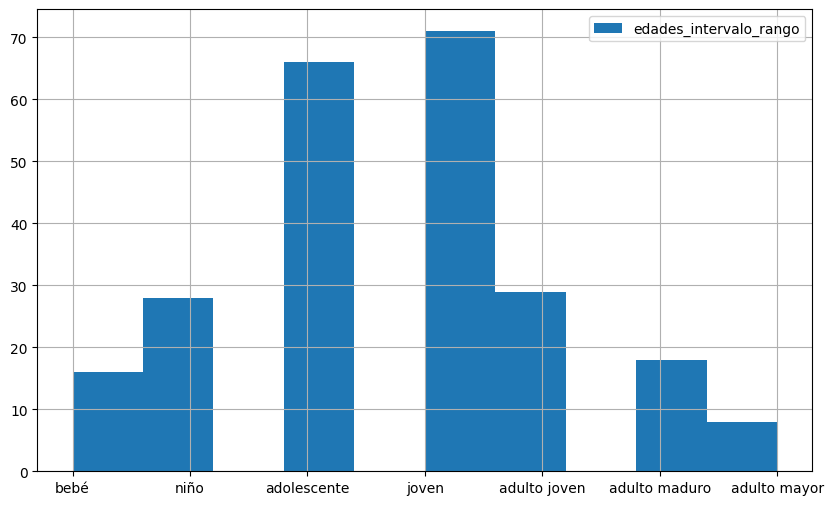

In [60]:
df_edades['edades_intervalo_rango'].hist(figsize=(10,6), legend=True)

* Leer el archivo llamado `Vol-Pot.csv`

In [95]:
df_vol_pot =pd.read_csv(ruta+'Vol-Pot.csv')
df_vol_pot.head()

,Volumen,Potencia
0,0.000000,0.000000
1,0.010001,0.000500
2,0.020002,0.001001
3,0.030003,0.001501
4,0.040004,0.002002


In [96]:
df_vol_pot.describe()

,Volumen,Potencia
count,10000.000000,10000.000000
mean,50.000000,28.487155
std,28.871844,36.524909
min,0.000000,0.000000
25%,25.000000,2.490343
50%,50.000000,11.182494
75%,75.000000,41.521083
max,100.000000,147.413159


* Discretizar la columna de `Potencia` en 10 binas de forma que el intervalo crezca de forma exponencial:
```python
bins=10
intervalo=[np.exp(A*i)-B for i in range(bins+1)]
```
(Encontrar `A` y `B` de forma que abarque el rango de la columna `Potencia`).

In [97]:
import sympy
# Definimos las variables simbólicas
A, B = sympy.symbols('A B', real=True)
bins=10
Max = df_vol_pot['Potencia'].max()
Min = df_vol_pot['Potencia'].min()
Max, Min

(147.413159, 0.0)

In [98]:
# Definimos el sistema de ecuaciones con i = 0 y  i = 10 (bins primero y ultimo)
eq1 = sympy.exp(A*0) - B - Min
eq2 = sympy.exp(A*10) - B - Max

# Resolvemos el sistema de ecuaciones
sol = sympy.solvers.solve((eq1, eq2), (A, B))
A_val, B_val = float(sol[0][0]), float(sol[0][1])
A_val, B_val


(0.49999999993088445, 1.0)

In [99]:

intervalos_potencia=[np.exp(A_val*i)-B_val for i in range(bins+1)]
intervalos_potencia

[0.0,
 0.6487212705861758,
 1.718281828083294,
 3.4816890694088016,
 6.389056096887856,
 11.182493956493474,
 19.085536914858334,
 32.11545194267076,
 53.59815000295559,
 89.01713124452753,
 147.413159]

* ¿Cuántos datos se agrupan en cada intervalo para la columna de `Potencia` y cuántos para la columna de `Volumen`?

In [102]:
# Si utlizamos los mismos intervalos para Potencia y Volumen (No se indica lo contrario)
df_vol_pot['potencia_intervalo'] = pd.cut(df_vol_pot['Potencia'], intervalos_potencia, include_lowest=True)
df_vol_pot['volumen_intervalo'] = pd.cut(df_vol_pot['Volumen'], intervalos_potencia, include_lowest=True)
df_vol_pot['potencia_intervalo'].value_counts(sort=False)

(-0.001, 0.649]      1000
(0.649, 1.718]       1000
(1.718, 3.482]       1000
(3.482, 6.389]       1000
(6.389, 11.182]      1000
(11.182, 19.086]     1000
(19.086, 32.115]     1000
(32.115, 53.598]     1000
(53.598, 89.017]     1000
(89.017, 147.413]    1000
Name: potencia_intervalo, dtype: int64

In [103]:
df_vol_pot['volumen_intervalo'].value_counts(sort=False)

(-0.001, 0.649]        65
(0.649, 1.718]        107
(1.718, 3.482]        177
(3.482, 6.389]        290
(6.389, 11.182]       480
(11.182, 19.086]      790
(19.086, 32.115]     1303
(32.115, 53.598]     2148
(53.598, 89.017]     3541
(89.017, 147.413]    1099
Name: volumen_intervalo, dtype: int64